In [53]:
import cv2
import os
import random
random.seed(255)
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # adjustment for histograms
    if kwargs.get("is_histogram", False):
        plt.figure(figsize=figsize)
        plt.plot(image)
    else:
        width=image.shape[1] 
        height=image.shape[0]
        margin=50 
        # dots per inch
        dpi=100.
        # inches
        figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
        #axes ratio
        left = margin/dpi/figsize[0] 
        bottom = margin/dpi/figsize[1]
        fig = plt.figure(figsize=figsize, dpi=dpi)
        fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
        _ = plt.imshow(image, cmap=cmap)
        plt.axis("off")
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    plt.show()
    
def display_histogram(histograms, figsize=(6, 6), **kwargs):
    plt.figure(figsize=figsize)
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    for h, c in histograms:
        plt.plot(h, color=c)
    plt.show()
    
    
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
    
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
    
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))
    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)
    # return the resized image
    return resized

In [4]:
from imutils import paths
n_dir = "/Users/cn180450/IdeaProjects/Deep-Learning/check_xray/chest_xray/test/NORMAL/"
p_dir = "/Users/cn180450/IdeaProjects/Deep-Learning/check_xray/chest_xray/test/PNEUMONIA/"
normal = os.listdir(n_dir)
positive = os.listdir(p_dir)
print(len(normal), len(positive))

234 390


In [77]:
def ben_method(image, sigmaX=10):
    # dst(I)=saturate(src1(I)∗alpha + src2(I)∗beta + gamma)
    image = cv2.addWeighted(
        image, 4, cv2.GaussianBlur(image ,(0,0), sigmaX), -4, 128
    )
    return image

IM-0033-0001.jpeg


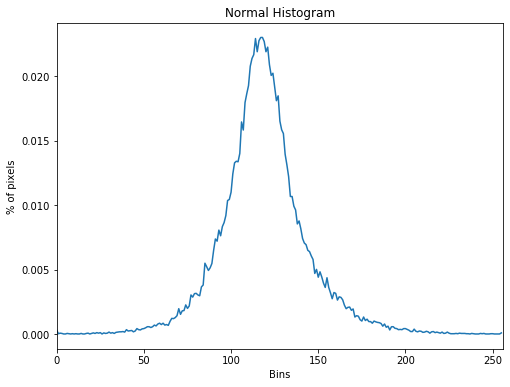

person78_bacteria_387.jpeg


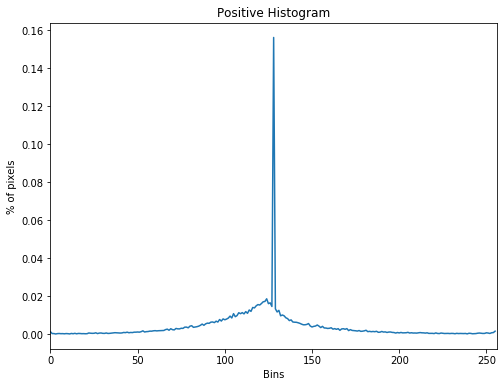

In [78]:
SEED = 256
WIDTH = 228
HIEGHT = 228
SIGMAX = 10.5

# normal
random.seed(SEED)
image_normal = random.sample(normal, 1)[0]
print(image_normal)

image_normal = cv2.imread(n_dir + image_normal)
# image_normal = resize(image_normal, width=WIDTH, height=HIEGHT)
gray_normal = cv2.cvtColor(image_normal, cv2.COLOR_BGR2GRAY)

# apply preprocessing
gray_normal = ben_method(gray_normal, SIGMAX)
# gray_normal = cv2.GaussianBlur(gray_normal, (0, 0), 10)
gray_normal = resize(gray_normal, width=WIDTH, height=HIEGHT)

# display(gray_normal, flip=False, cmap="gray")

# calculate histogram
hist_normal = cv2.calcHist([gray_normal], [0], None, [256], [0, 256])
hist_normal /= hist_normal.sum()

display(
    hist_normal, flip=False, is_histogram=True, figsize=(8, 6),
    xlim=[0, 256], xlabel="Bins", ylabel="% of pixels",
    title="Normal Histogram"
)

# positive
random.seed(SEED)
image_positive = random.sample(positive, 1)[0]
print(image_positive)

image_positive = cv2.imread(p_dir + image_positive)
# image_positive = resize(image_positive, width=WIDTH, height=HIEGHT)
gray_positive = cv2.cvtColor(image_positive, cv2.COLOR_BGR2GRAY)

# apply preprocessing 
gray_positive = ben_method(gray_positive, SIGMAX)
# gray_positive = cv2.GaussianBlur(gray_positive, (0, 0), 10)
gray_positive = resize(gray_positive, width=WIDTH, height=HIEGHT)

# display(gray_positive, flip=False, cmap="gray")

# calculate histogram
hist_positive = cv2.calcHist([gray_positive], [0], None, [256], [0, 256])
hist_positive /= hist_positive.sum()

display(
    hist_positive, flip=False, is_histogram=True, figsize=(8, 6),
    xlim=[0, 256], xlabel="Bins", ylabel="% of pixels",
    title="Positive Histogram"
)